# Play the dungeon MDP

In [1]:
import sys
sys.path.append('../mdp/')
from dungeon import DungeonMDP
import numpy as np
from IPython.display import clear_output, display, HTML

In [2]:
mdp = DungeonMDP()

In [3]:
R = 0
current_room = list(mdp.start())[0]
options = mdp.actions(current_room)
messages = {
    'E': '<h2>You are in an empty room. There are 2 doors.</h2>',
    'M': '<h2>O God, you meet a monster! Your gold has been stolen!</h2',
    'T': '<h2>There is a treasure! Very good...</h2>',
    'O': '<h2>The exit finally!</h2>'
}

exit = False

while not exit:
    display(HTML(messages[current_room]))
    print('Your reward for this exploration is {}\n'.format(R))
    choice = input('Choose between these possible actions {}\n\n'.format(options))
    if choice.upper() in options and current_room != 'O':
        action = choice.upper()
        next_stages = mdp.successors(current_room, action)
        next_rooms = [s_prime for s_prime, p, r in next_stages]
        p = [p for s_prime, p, r in next_stages]
        next_room = np.random.choice(next_rooms, p=p)
        reward = mdp.reward(current_room, action, next_room)
        current_room = next_room
        R += reward
    else:
        print("Game is finished. Your total reward is {}".format(R))
        exit = True
    clear_output(wait=True)

Your reward for this exploration is 0

Choose between these possible actions {'R', 'L'}

quit
Game is finished. Your total reward is 0


## Q-learning

In [4]:
from algorithms import Qlearning
from utils import show_q_learning
import pandas as pd

In [5]:
Q, history, rewards = Qlearning(mdp)

In [6]:
pd.DataFrame(Q).T

,R,L
M,1.201629,2.063436
O,0.000000,0.000000
E,-1.279666,0.706381
T,-3.926976,-2.574035


In [7]:
show_q_learning(history)

,R,L
M,-0.178518,-0.091168
O,0.000000,0.000000
E,-0.015465,0.291363
T,0.005008,-0.265757


quit


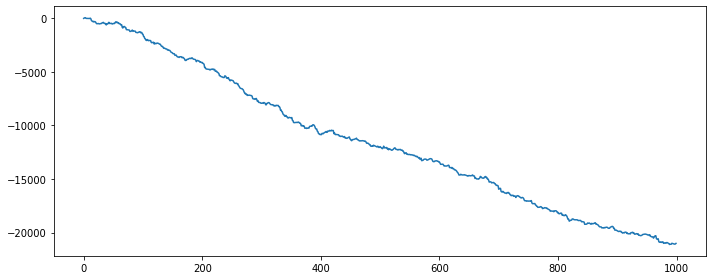

In [8]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(np.cumsum(rewards))
plt.tight_layout()
plt.show()

## SARSA

In [9]:
from algorithms import sarsa

In [10]:
Q, history, rewards = sarsa(mdp)

In [11]:
pd.DataFrame(Q).T

,R,L
M,-1.820142,-1.181748
O,0.000000,0.000000
E,-1.224099,-2.744972
T,-6.557727,-2.930509


In [12]:
show_q_learning(history)

,R,L
M,-0.882142,0.665003
O,0.000000,0.000000
E,-1.634835,-1.611570
T,-2.469182,-0.998913


quit
